In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import warnings

warnings.filterwarnings("ignore")

In [2]:
from src.utils import *

In [4]:
path = 'data/Patio.csv'

Our data consists on 7320 ratings - 23085 users rated 2207 products from the category **Patio**. Its format is presented below where ``userId`` is a unique user id, ``ProductId`` is a unique movie id, ``score`` is the rating 0–5. 

In [5]:
ratings = load_reviews_to_df(path)
ratings.head()

,productId,userId,score
0,B0009TRITS,A03371112IP0NDM0XC0O3,5.0
1,B000E7QYNG,A078888874MAMNVAK6R3,5.0
2,B00005YX2Z,A100TK3LWL1SHF,5.0
3,B0007CXT68,A100UEKX4SADQ,1.0
4,B00076KL38,A100WO06OQR8BQ,5.0


We split our data into training set (80%) and validation set (20%). Next we transform resulted dataframes into matrices. To fill `nan` in the training matrix we use mean of user's mean and product's mean. 

In [6]:
train, validation = train_test_split(ratings = load_score_data(path))

### Results for NMF.

We start with NMF model.

In [7]:
from sklearn.decomposition import NMF

In [8]:
RMSE_values = []

for i in range(50):
    model = NMF(n_components=i+1, init='random', random_state=0, alpha=.5)
    W = model.fit_transform(train)
    H = model.components_
    Z_approximated = np.dot(W, H) 
    RMSE_values.append(rmse(Z_approximated, validation))
    if (i+1)%10 == 0:
        print("done for: " + str(i + 1) + " components")

done for: 10 components
done for: 20 components
done for: 30 components
done for: 40 components
done for: 50 components


No handles with labels found to put in legend.


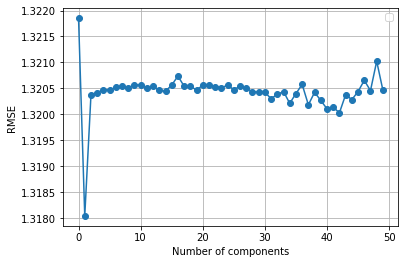

In [10]:
plt.plot(range(50), RMSE_values, marker='o')
plt.xlabel('Number of components')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.show()

The **best score** which we obtained for **NMF**:

In [11]:
min(RMSE_values)

1.3180400481232497

### Results for SVD.

Now we use SVD model to predict missing ratings.

In [12]:
from sklearn.decomposition import TruncatedSVD

In [14]:
RMSE_values = []

for i in range(50):
    svd = TruncatedSVD(n_components=i+1, random_state=42)
    svd.fit(train)
    Sigma2 = np.diag(svd.singular_values_)
    VT = svd.components_
    W = svd.transform(train) / svd.singular_values_
    H = np.dot(Sigma2, VT)
    Z_approximated = np.dot(W, H)
    RMSE_values.append(rmse(Z_approximated, validation))
    if (i+1)%10 == 0:
        print("done for: " + str(i + 1) + " components")

done for: 10 components
done for: 20 components
done for: 30 components
done for: 40 components
done for: 50 components


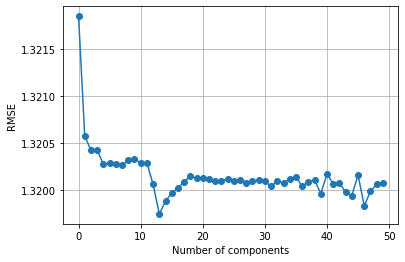

In [15]:
plt.plot(range(50), RMSE_values, marker='o')
plt.xlabel('Number of components')
plt.ylabel('RMSE')
plt.grid()
plt.show()

The **best score** which we obtained for **SVD**:

In [16]:
min(RMSE_values)

1.3197441552986486